In [1]:
from high_level_tdc import *
from time import sleep
from matplotlib import pyplot as plt
import numpy as np

In [2]:

#enable_calib_pulser()
disable_calib_pulser()

print(read_scaler(0))
for i in range(0,1):
  print(scaler_rate(i,delay=1))

[2565, 121565]
576132.330795112


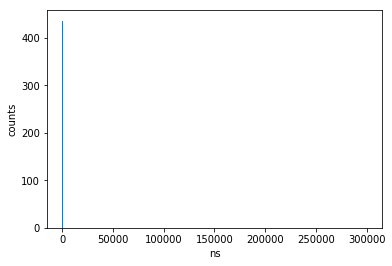

Mean   (ns): 15.203
StdDev (ns): 0.208


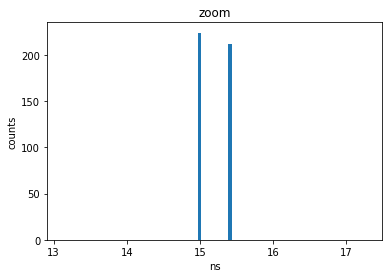

Mean   (ns): 15.203
StdDev (ns): 0.208


In [3]:
##################################################
##                measure levcon                ##
##################################################


disable_calib_pulser()
#enable_calib_pulser()
disable_stretcher()

ch=0

n = 500

l = 0
r = 300e3
bins=300

tot_list = []

for i in range(0,n):
    arm()
    sleep(0.002) 
    tot_list += [read_tot(ch)]
    
tot_ns = np.array(tot_list)*1e9
mask = (tot_ns >l) & (tot_ns <r)
tot_ns = tot_ns[mask]

plt.hist(tot_ns,bins=np.linspace(l,r,bins))
plt.xlabel("ns")
plt.ylabel("counts")
plt.show()

mean = np.mean(tot_ns)
std  = np.std(tot_ns)

print("Mean   (ns): {:3.3f}".format(np.mean(tot_ns)))
print("StdDev (ns): {:3.3f}".format(np.std(tot_ns)))

zoomrange = 10*np.max([std,0.2])

l =  mean - zoomrange
r = mean + zoomrange
bins=100

    
tot_ns = np.array(tot_list)*1e9
mask = (tot_ns >l) & (tot_ns <r)
tot_ns = tot_ns[mask]

plt.hist(tot_ns,bins=np.linspace(l,r,bins))
plt.xlabel("ns")
plt.ylabel("counts")
plt.title("zoom")
plt.show()

print("Mean   (ns): {:3.3f}".format(np.mean(tot_ns)))
print("StdDev (ns): {:3.3f}".format(np.std(tot_ns)))